## Opening docs

In [46]:
!python -m spacy download fr

  Running setup.py install for fr-core-news-sm: started
    Running setup.py install for fr-core-news-sm: finished with status 'done'
[+] Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
[x] Couldn't link model to 'fr'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\abedd\Anaconda3\lib\site-packages\fr_core_news_sm -->
C:\Users\abedd\Anaconda3\lib\site-packages\spacy\data\fr
[!] Download successful but linking failed
Creating a shortcut link for 'fr' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('fr_core_news_sm')


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
Vous ne disposez pas de privilèges suffisants pour effectuer cette opération.


In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
import string
import os
import networkx as nx
import codecs
from os import path

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")


In [11]:
!pip install textblob

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
# %load ../../utils/read_data.py
import networkx as nx
import codecs
import os
from os import path

def get_data_train(data_path='./data/'):
    with open(path.join(data_path, "train.csv"), 'r') as f:
        train_data = f.read().splitlines()

    train_hosts = list()
    y_train = list()
    for row in train_data:
        host, label = row.split(",")
        train_hosts.append(host)
        y_train.append(label.lower())

    # Text data
    # Load the textual content of a set of webpages for each host into the dictionary "data".
    # The encoding parameter is required since the majority of our data is french.
    text = dict()
    text_path = path.join(data_path, 'text/')
    filenames = os.listdir(text_path)

    for filename in filenames:
        try:
            with codecs.open(path.join(text_path, filename), encoding='utf-8') as f:
                text[filename] = f.read().replace("\n", "").lower()
        except:
            with codecs.open(path.join(text_path, filename), encoding='latin-1') as f:
                text[filename] = f.read().replace("\n", "").lower()

    X_train = list()
    for host in train_hosts:
        if host in text:
            X_train.append([host, text[host]])
        else:
            X_train.append([host, ''])

    return X_train, y_train


def get_data_full(data_path='./data/'):
    with open(path.join(data_path, "train.csv"), 'r') as f:
        train_data = f.read().splitlines()
    with open(path.join(data_path, "test.csv"), 'r') as f:
        test_hosts = f.read().splitlines()

    train_hosts = list()
    y_train = list()
    for row in train_data:
        host, label = row.split(",")
        train_hosts.append(host)
        y_train.append(label.lower())

    # Text data
    # Load the textual content of a set of webpages for each host into the dictionary "data".
    # The encoding parameter is required since the majority of our data is french.
    text = dict()
    text_path = path.join(data_path, 'text/')
    filenames = os.listdir(text_path)

    for filename in filenames:
        try:
            with codecs.open(path.join(text_path, filename), encoding='utf-8') as f:
                text[filename] = f.read().replace("\n", "").lower()
        except:
            with codecs.open(path.join(text_path, filename), encoding='latin-1') as f:
                text[filename] = f.read().replace("\n", "").lower()

    X_train = list()
    for host in train_hosts:
        if host in text:
            X_train.append([host, text[host]])
        else:
            X_train.append([host, ''])
    # Get textual content of web hosts of the test set
    X_test = list()
    for host in test_hosts:
        if host in text:
            X_test.append([host, text[host]])
        else:
            X_test.append([host, ''])
    return X_train, y_train, X_test, test_hosts


In [4]:
X_train, y_train, X_test, test_hosts = get_data_full(data_path='../../data/') 

In [5]:
data_train = pd.DataFrame({'text': X_train,'category': y_train,})
data_train[['train_host','text']] = pd.DataFrame(data_train.text.values.tolist(), index= data_train.index)
data_train.set_index('train_host', inplace=True)
data_train.head()

,text,category
train_host,,
9032,#polepharma » flux polepharma » flux des commentaires alternate\r alternate\r\r polepharma\r polepharma ﻿ recherche_________ submit\r (button) toggle navigation\r polepharma\r\r *...,health/medical
5346,301 moved permanently\r __________________________________________________________________\r\r nginx\r ...,entertainment
18778,"(button) fermer\r\r en poursuivant votre navigation sans modifier vos paramètres de\r cookies, vous acceptez l'utilisation des cookies pour disposer de\r services et d'offres adaptés à vo...",entertainment
11939,#hal\r\r (button) toggle navigation\r ccsd\r * hal\r + hal\r + halshs\r + tel\r + médihal\r + liste des portails\r +\r + a...,education/research
17502,user-agent: * disallow: disallow: /publishers user-agent: yandex\r crawl-delay: 3 sitemap: https://www.soft32.com/sitemap.xml\r\r télécharger des logiciels gratuits pour windows | soft32\r ...,tech/science


In [6]:
data_test = pd.DataFrame({'text': X_test,})
data_test[['test_host','text']] = pd.DataFrame(data_test.text.values.tolist(), index= data_test.index)
data_test.set_index('test_host', inplace=True)
data_test.head()

,text
test_host,
27997,\r\r iframe: //www.googletagmanager.com/ns.html?id=gtm-k598bts\r\r skip to main content\r\r * about\r * alumni\r * news & events\r * give\r * go griffs\r * my canisius\...
9316,iframe: https://www.googletagmanager.com/ns.html?id=gtm-mhb3554\r\r [p?c1=7&c2=20061681&c3=1000055&cv=2.0&cj=1]\r\r poki\r facebook logo 722k youtube logo 362k\r ____________________ (b...
27045,#toutes les astuces beauté ⋅ astuces beauté ⋅ sephora à la une ⋅\r astuces beauté ⋅ sephora sephora x richaard ⋅ astuces beauté ⋅ sephora\r tendance ⋅ astuces beauté ⋅ sephora tutos ⋅ astuc...
19805,[logodefault.jpg]\r [etab_juvisy-sur-orge.png]\r juvisy-sur-orge\r 01 69 54 27 27\r [etab_longjumeau.png]\r longjumeau\r 01 64 54 33 33\r [etab_orsay.png]\r orsay\r 01 69 29 7...
26580,#l'école de demain » flux l'école de demain » flux des commentaires\r l'école de demain » quand des professeurs d’histoire-géographie\r renversent leur classe 1/2 flux des commentaires inte...


In [7]:
text_sample = data_train['text'][10]
text_sample[:500]

"\r   friche la belle de mai\r\r   billetterie\r   fermer\r\r   english\r\r     *\r     * agenda\r     * cinéma le gyptis\r     * bientôt\r     * infos pratiques\r     * l'œil de la friche\r\r     *\r     * agenda\r     * cinéma le gyptis\r     * infos pratiques\r     * billetterie\r\r     * accueil\r     * agenda\r     * cinéma le gyptis\r     * bientôt\r     * infos pratiques\r     * l'œil de la friche\r\rc'est quoi la friche ?\r\r     * la friche\r     * les résidents\r     * les lieux\r     * actualités et projets\r     * his"

## Text Feature extraction, Part1

#### 1. Number of hashtags

In [8]:
data_train['hashtags_count'] = data_train['text'].apply( lambda x : len( [ x for x in x.split() if x.startswith('#') ]) )
data_test['hashtags_count'] = data_test['text'].apply( lambda x : len( [ x for x in x.split() if x.startswith('#') ]) )

In [16]:
data_train.head()

,text,category,hashtags_count
train_host,,,
9032,#polepharma » flux polepharma » flux des commentaires alternate\r alternate\r\r polepharma\r polepharma ﻿ recherche_________ submit\r (button) toggle navigation\r polepharma\r\r *...,health/medical,10
5346,301 moved permanently\r __________________________________________________________________\r\r nginx\r ...,entertainment,0
18778,"(button) fermer\r\r en poursuivant votre navigation sans modifier vos paramètres de\r cookies, vous acceptez l'utilisation des cookies pour disposer de\r services et d'offres adaptés à vo...",entertainment,3
11939,#hal\r\r (button) toggle navigation\r ccsd\r * hal\r + hal\r + halshs\r + tel\r + médihal\r + liste des portails\r +\r + a...,education/research,2
17502,user-agent: * disallow: disallow: /publishers user-agent: yandex\r crawl-delay: 3 sitemap: https://www.soft32.com/sitemap.xml\r\r télécharger des logiciels gratuits pour windows | soft32\r ...,tech/science,1


####  2. Number of users tagged 

In [9]:
data_train['users_tagged'] = data_train['text'].apply( lambda x : len( [ x for x in x.split() if x.startswith('@') ]) )
data_test['users_tagged'] = data_test['text'].apply( lambda x : len( [ x for x in x.split() if x.startswith('@') ]) )

data_train.head()

,text,category,hashtags_count,users_tagged
train_host,,,,
9032,#polepharma » flux polepharma » flux des commentaires alternate\r alternate\r\r polepharma\r polepharma ﻿ recherche_________ submit\r (button) toggle navigation\r polepharma\r\r *...,health/medical,10,8
5346,301 moved permanently\r __________________________________________________________________\r\r nginx\r ...,entertainment,0,0
18778,"(button) fermer\r\r en poursuivant votre navigation sans modifier vos paramètres de\r cookies, vous acceptez l'utilisation des cookies pour disposer de\r services et d'offres adaptés à vo...",entertainment,3,0
11939,#hal\r\r (button) toggle navigation\r ccsd\r * hal\r + hal\r + halshs\r + tel\r + médihal\r + liste des portails\r +\r + a...,education/research,2,0
17502,user-agent: * disallow: disallow: /publishers user-agent: yandex\r crawl-delay: 3 sitemap: https://www.soft32.com/sitemap.xml\r\r télécharger des logiciels gratuits pour windows | soft32\r ...,tech/science,1,0


#### 3. Number of numerical values 

In [10]:
data_train['numeric'] = data_train['text'].apply( lambda x : len( [ x for x in x.split() if x.isdigit() ]) )
data_test['numeric'] = data_test['text'].apply( lambda x : len( [ x for x in x.split() if x.isdigit() ]) )
data_train.head()

,text,category,hashtags_count,users_tagged,numeric
train_host,,,,,
9032,#polepharma » flux polepharma » flux des commentaires alternate\r alternate\r\r polepharma\r polepharma ﻿ recherche_________ submit\r (button) toggle navigation\r polepharma\r\r *...,health/medical,10,8,352
5346,301 moved permanently\r __________________________________________________________________\r\r nginx\r ...,entertainment,0,0,3
18778,"(button) fermer\r\r en poursuivant votre navigation sans modifier vos paramètres de\r cookies, vous acceptez l'utilisation des cookies pour disposer de\r services et d'offres adaptés à vo...",entertainment,3,0,101
11939,#hal\r\r (button) toggle navigation\r ccsd\r * hal\r + hal\r + halshs\r + tel\r + médihal\r + liste des portails\r +\r + a...,education/research,2,0,12
17502,user-agent: * disallow: disallow: /publishers user-agent: yandex\r crawl-delay: 3 sitemap: https://www.soft32.com/sitemap.xml\r\r télécharger des logiciels gratuits pour windows | soft32\r ...,tech/science,1,0,21


#### 4.Numbers of emojis

In [11]:
import emoji


def count_emoji(text):

    emoji_list = []
    for word in text:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return len(emoji_list)

In [12]:
data_train['count emoji'] = data_train['text'].apply( lambda x: count_emoji(x) )
data_test['count emoji'] = data_test['text'].apply( lambda x: count_emoji(x) )

In [13]:
data_train.head()

,text,category,hashtags_count,users_tagged,numeric,count emoji
train_host,,,,,,
9032,#polepharma » flux polepharma » flux des commentaires alternate\r alternate\r\r polepharma\r polepharma ﻿ recherche_________ submit\r (button) toggle navigation\r polepharma\r\r *...,health/medical,10,8,352,8
5346,301 moved permanently\r __________________________________________________________________\r\r nginx\r ...,entertainment,0,0,3,0
18778,"(button) fermer\r\r en poursuivant votre navigation sans modifier vos paramètres de\r cookies, vous acceptez l'utilisation des cookies pour disposer de\r services et d'offres adaptés à vo...",entertainment,3,0,101,2
11939,#hal\r\r (button) toggle navigation\r ccsd\r * hal\r + hal\r + halshs\r + tel\r + médihal\r + liste des portails\r +\r + a...,education/research,2,0,12,0
17502,user-agent: * disallow: disallow: /publishers user-agent: yandex\r crawl-delay: 3 sitemap: https://www.soft32.com/sitemap.xml\r\r télécharger des logiciels gratuits pour windows | soft32\r ...,tech/science,1,0,21,1


In [14]:
def most_50_freq(text):
    frequency = Counter()
    for word in text.strip().split():
        frequency[word] +=1
    most_50_freq = frequency.most_common(50)
    print(most_50_freq)

In [15]:
most_50_freq(text_sample)

[('*', 259), ('de', 163), ('la', 133), ('à', 69), ('le', 65), ('et', 65), ('friche', 64), ('les', 52), ('des', 46), ('du', 32), ('belle', 27), ('en', 27), ('mai', 26), ('+', 24), ('sur', 22), ('par', 22), ('ou', 22), ('site', 21), ('pratiques', 20), ('public', 18), ('un', 17), ('jeune', 16), ('agenda', 15), ('cinéma', 15), ('gyptis', 15), ('infos', 15), ('une', 15), (':', 15), ('billetterie', 13), ('bientôt', 13), ('?', 13), ('partager', 13), ("l'œil", 12), ('résidents', 12), ('facebook', 12), ('twitter', 12), ('dans', 12), ('que', 12), ('vous', 11), ('accueil', 10), ('aux', 10), ('-', 10), ("aujourd'hui", 10), ('utilisation', 10), ("c'est", 9), ('quoi', 9), ('lieux', 9), ('actualités', 9), ('projets', 9), ('histoire', 9)]


In [16]:
labels = ['business/finance', 'education/research', 'entertainment', 'health/medical',
          'news/press', 'politics/government/law', 'sports', 'tech/science']

## Preprocessing

In [17]:
# %load ../../utils/text_preprocessing.py
import numpy as np
import pandas as pd
import re
import string
import os
import networkx as nx
import codecs
from os import path
from bs4 import BeautifulSoup
from string import digits
from nltk.stem.snowball import FrenchStemmer
import nltk
from nltk.corpus import stopwords
import numpy as np
import pickle

nltk.download('wordnet')
import spacy

### Remove html tags and uris from contents
uri_re = r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'

def strip_tags_and_uris(x):
    if x:
        # BeautifulSoup on content
        soup = BeautifulSoup(x, "html.parser")
        # Stripping all <code> tags with their content if any
        if soup.code:
            soup.code.decompose()
        # Get all the text out of the html
        text =  soup.get_text()
        # Returning text stripping out all uris
        return re.sub(uri_re, "", text)
    else:
        return ''

def clean(x):
    # Lowercasing all words
    x = x.lower()
    # Removing non ASCII chars
    #x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = re.sub(r'ô','o',x)
    x = re.sub(r'[éêè]','e',x)
    #x = re.sub(r'([^a-zéèûôàêô])',' ',x)
    x = re.sub('\n', '',x)
    x = re.sub("(\s+.\s+)", ' ', x)#remove any single charecters hanging between 2 spaces
    # Removing (replacing with empty spaces actually) all the punctuations
    return re.sub("["+string.punctuation+"]", " ", x)

stops = stopwords.words('french')


#We added this list to give more sens to our results.
other_stopwords = ['les','a','afin','alors',  'plus', 'moins', 'cette','faut', 'tout', 'tous', 'tre', 'si','non','doit','avoir','comme','trop','leurs','faire','ils','peut','bien','aussi','cela','gens', 'sans', 'car', 'très','png','in', 'fait','être', 'mai','plus','bu','int','id','and','pr','cr','jpg','chu', 'faudrait', 'the','this','was','have','us','for','button']

stopWords = stopwords.words('french')
stops.extend(stopwords.words('english'))
stops.extend(other_stopwords)
stops = set(stops)

def remove_stopwords(x):
    # Removing all the stopwords
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)

def remove_digits(x):
    rm_digits = str.maketrans('', '', digits)
    res = x.translate(rm_digits)
    return res

def remove_non_alpha(x):
    filtered_words = [word for word in x.split() if word.isalpha()]
    return " ".join(filtered_words)

nlp = spacy.load('fr_core_news_sm', disable=['parser', 'ner'])
nlp.max_length = 10000000
lemmas_to_keep = ['NOUN', 'PROPN', 'VERB', 'ADJ']
def lemmatize(x):
    doc = nlp(x)
    lemmas = ' '.join(token.lemma_ for token in doc if token.pos_ in lemmas_to_keep)
    return lemmas

def full_preprocessing(df, filename):
    
    text = df["text"]
    text = text.map(strip_tags_and_uris)
    text = text.map(clean)
    text = text.map(remove_stopwords)
    text = text.map(remove_non_alpha)
    text = text.map(lemmatize)

    df["text"] = text
    df.to_csv(filename)
    return df


#Une fois on fixe le preprocessing, on ajoute try .. except
"""def full_preprocessing(df, filename):
    try:
        return pd.read_csv(filename)
    except:
        text = df["text"]
        text = text.map(strip_tags_and_uris)
        text = text.map(clean)
        text = text.map(remove_stopwords)
        text = text.map(remove_non_alpha)
        text = text.map(lemmatize)
        df["text"] = text
        df.to_csv(filename)
    return df"""

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abedd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'def full_preprocessing(df, filename):\n    try:\n        return pd.read_csv(filename)\n    except:\n        text = df["text"]\n        text = text.map(strip_tags_and_uris)\n        text = text.map(clean)\n        text = text.map(remove_stopwords)\n        text = text.map(remove_non_alpha)\n        text = text.map(lemmatize)\n        df["text"] = text\n        df.to_csv(filename)\n    return df'

In [18]:
data_train = full_preprocessing(data_train, 'train_clean.csv.zip')
data_test = full_preprocessing(data_test, 'test_clean.csv.zip')

In [19]:
data_train.head()

,text,category,hashtags_count,users_tagged,numeric,count emoji
train_host,,,,,,
9032,polepharma flux commentaire alternate alternat polepharma recherche navigation polepharma polepharma chiffre cles territoire region centre val loir region normandie conseil chartre agglo pays dreu...,health/medical,10,8,352,8
5346,moved permanently nginx moved permanently nginx moved permanently nginx,entertainment,0,0,3,0
18778,fermer navigation modifier parametre cookie acceptez utilisation cookie disposer service offre adapte centre interet information page mention legale aller menu aller contenu haut alper haut alper ...,entertainment,3,0,101,2
11939,hal toggle navigation hal hal halsh tel medihal liste portail aurehal documentation episcience episcience revue documentation sciencesconf org support connexion connexion connexion orcid connecter...,education/research,2,0,12,0
17502,user disallow publisher user yandex crawl telecharger logiciel gratuit windows windows mac blog chercher second continue telecharger horizon accueil jeu horizon horizon horizon telecharger direct ...,tech/science,1,0,21,1


In [20]:
text_sample_preprocessed = data_train['text'][10]
text_sample_preprocessed[:500]

'friche bel billetterie fermer english agenda cinema gyptis bientot info pratique friche agenda cinema info pratique billetterie accueil agenda cinema gyptis bientot info pratique friche frich friche resident lieux actualite projet histoire bel jeunesse jeune public famill action culturel agenda cinema gyptis bientot info pratique friche frich friche resident lieux actualite projet histoire bel jeunesse jeune public famill action culturel rejoignez facebook twitter instagram vimeo linkedin englis'

In [21]:
most_50_freq(text_sample_preprocessed)

[('friche', 53), ('bel', 27), ('site', 26), ('pratique', 20), ('public', 19), ('utilisation', 17), ('jeune', 16), ('billetterie', 15), ('agenda', 15), ('cinema', 15), ('info', 15), ('mercredi', 14), ('bientot', 13), ('partager', 13), ('gyptis', 12), ('frich', 12), ('resident', 12), ('projet', 12), ('twitter', 12), ('atelier', 11), ('aujourd', 11), ('droit', 11), ('contenir', 11), ('espace', 10), ('petit', 10), ('hui', 10), ('lieux', 9), ('actualite', 9), ('histoire', 9), ('jeunesse', 9), ('famill', 9), ('action', 9), ('facebook', 9), ('instagram', 9), ('vimeo', 9), ('linkedin', 9), ('newsletter', 9), ('recherche', 9), ('accueil', 8), ('thomas', 8), ('lanfranchi', 8), ('invit', 8), ('lieu', 8), ('information', 8), ('google', 8), ('ete', 7), ('exposition', 7), ('gratuit', 7), ('autre', 7), ('reproduction', 7)]


#### Remove missing samples

In [22]:
# Let's verify and count the nans
data_train.isnull().sum()

text              0
category          0
hashtags_count    0
users_tagged      0
numeric           0
count emoji       0
dtype: int64

In [23]:
#Delete the 25 rows with missing text
data_train.dropna(axis=0,inplace=True)

In [24]:
# Let's verify and count the nans
data_train.isnull().sum()

text              0
category          0
hashtags_count    0
users_tagged      0
numeric           0
count emoji       0
dtype: int64

##  Text Feature Extraction, Part 2 after preprocessing 

#### 5. Number of words in a text

In [25]:
data_train['length of doc'] = data_train['text'].apply( lambda x:  len(x.split())  )
data_test['length of doc'] = data_test['text'].apply( lambda x: len(x.split())  )

In [37]:
idx=np.where(data_train['length of doc']==0)
data_train=data_train.drop(data_train.index[idx])

In [38]:
idxt=np.where(data_test['length of doc']==0)
data_test=data_test.drop(data_test.index[idxt])

In [39]:
np.where(data_train['length of doc']==0)

(array([], dtype=int64),)

#### 6. Average word length 

In [40]:
def avg_word_length(t):
    words = t.split()
    return ( sum( len(word) for word in words ) / len(words))

In [41]:
data_train['avg word length'] = data_train['text'].apply( lambda x:  avg_word_length(x)  )
data_test['avg word length'] = data_test['text'].apply( lambda x: avg_word_length(x)  )

## EDA

In [18]:
#data_train_grouped = data_train.groupby('category').agg({'text':'concat'})
data_train['category'] = data_train['category'].astype('category')
data_train['category'].cat.categories

Index(['business/finance', 'education/research', 'entertainment',
       'health/medical', 'news/press', 'politics/government/law', 'sports',
       'tech/science'],
      dtype='object')

In [19]:
data_train_by_category = data_train.groupby('category').agg({'text':'sum'})
data_train_by_category

,text
category,
business/finance,connexion mot passer oubli devenez membre tester produit connecter category navigation chien alimentation alimentation boîte ler maternise friandise complement friandise complement toilettage hygi...
education/research,hal toggle navigation hal hal halsh tel medihal liste portail aurehal documentation episcience episcience revue documentation sciencesconf org support connexion connexion connexion orcid connecter...
entertainment,moved permanently nginx moved permanently nginx moved permanently nginxfermer navigation modifier parametre cookie acceptez utilisation cookie disposer service offre adapte centre interet informat...
health/medical,polepharma flux commentaire alternate alternat polepharma recherche navigation polepharma polepharma chiffre cles territoire region centre val loir region normandie conseil chartre agglo pays dreu...
news/press,jone corp corp network leading companier worlds diversified education information service jone barron bigcharts djx jone newswire factiver financial marketwatch markets risk compliance wsj confere...
politics/government/law,requested url administrator support go back url administrator support go back url administrator support go back url administrator support go back url administrator support go backassociation maire...
sports,mesure envie accompagn e recherche selectionnez critere souhaite laisser guider thematiqu restaurer restaurant animation animation site incontournable site incontournable activite site gratuit act...
tech/science,user disallow publisher user yandex crawl telecharger logiciel gratuit windows windows mac blog chercher second continue telecharger horizon accueil jeu horizonhorizon horizon telecharger direct h...


In [20]:
text_business_finance = data_train_by_category['text']['business/finance']
text_entertainment = data_train_by_category['text']['entertainment']
text_health_medical = data_train_by_category['text']['health/medical']
text_tech_science= data_train_by_category['text']['tech/science']
text_sports = data_train_by_category['text']['sports']
text_news_press = data_train_by_category['text']['news/press']
text_politics_law = data_train_by_category['text']['politics/government/law']

In [21]:
text_business_finance[:500]

'connexion mot passer oubli devenez membre tester produit connecter category navigation chien alimentation alimentation boîte ler maternise friandise complement friandise complement toilettage hygiene toilettage soin entretien antiparasitaire pipette collier spray crochet traitement habitat vermifuge comportement education anti anti fugu education rappel apprentissage repulsif traitement anxiete collier laisse harnai collier laisse harnai accessoire promenade cage accessoire transport cage access'

### Word cloud

In [22]:
#Let's visualize the word cloud of 30 most frequent words
def word_cloud(text):
    frequency = Counter()
    
    for word in text.strip().split():
        frequency[word] +=1
      
    wordcloud = WordCloud(max_font_size=100, max_words=30,background_color="white", colormap="Dark2")
    wordcloud.generate_from_frequencies(frequencies = frequency)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [23]:
most_50_freq(text_health_medical)

[('cancer', 10216), ('recherche', 6953), ('traitement', 4639), ('reference', 4106), ('promoteur', 2996), ('patient', 2954), ('association', 2673), ('sant', 2510), ('maladie', 2164), ('effet', 2106), ('clinique', 2105), ('site', 2085), ('investigateur', 2060), ('risque', 1899), ('nom', 1852), ('soin', 1786), ('professionnel', 1737), ('interne', 1713), ('charge', 1684), ('centre', 1618), ('vie', 1615), ('statut', 1610), ('sein', 1552), ('nouveau', 1549), ('interventionnel', 1535), ('depistage', 1519), ('apre', 1507), ('france', 1505), ('projet', 1455), ('chimiotherapie', 1446), ('categorie', 1399), ('formation', 1336), ('pratique', 1297), ('chirurgie', 1291), ('secondaire', 1289), ('radiotherapie', 1282), ('information', 1257), ('lien', 1219), ('essai', 1217), ('plan', 1188), ('medical', 1180), ('service', 1175), ('question', 1142), ('sante', 1079), ('personne', 1061), ('contacter', 1059), ('facteur', 1057), ('point', 1053), ('direct', 1035), ('autre', 1030)]


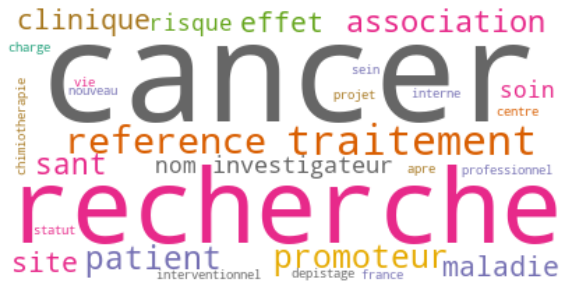

In [24]:

word_cloud(text_health_medical)


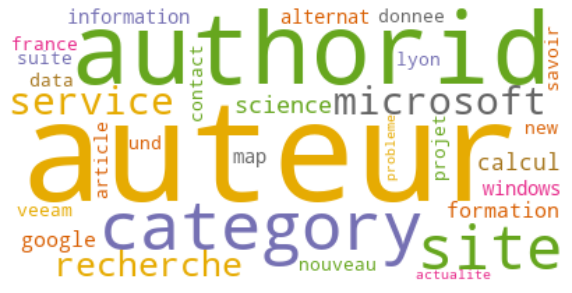

In [25]:
word_cloud(text_tech_science)

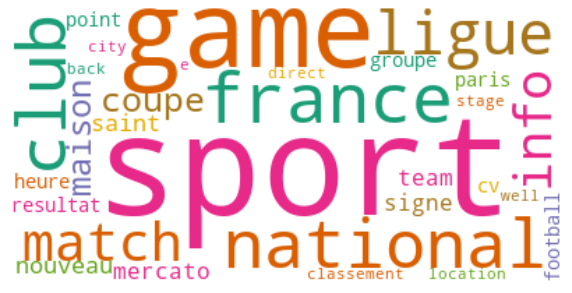

In [26]:
word_cloud(text_sports)

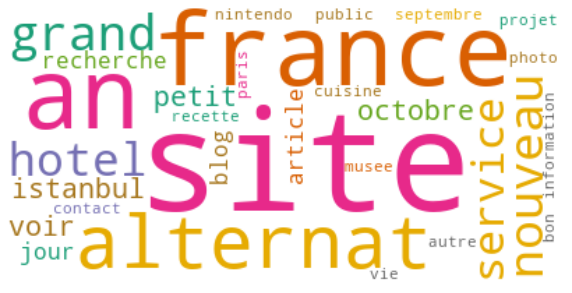

In [27]:
word_cloud(text_entertainment)

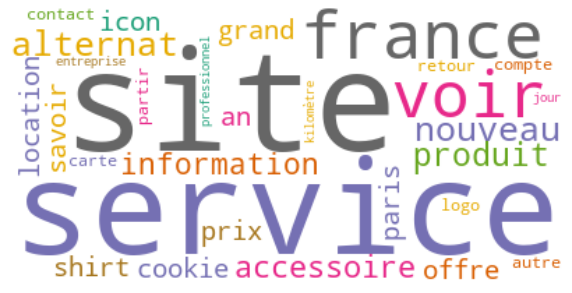

In [28]:
word_cloud(text_business_finance)

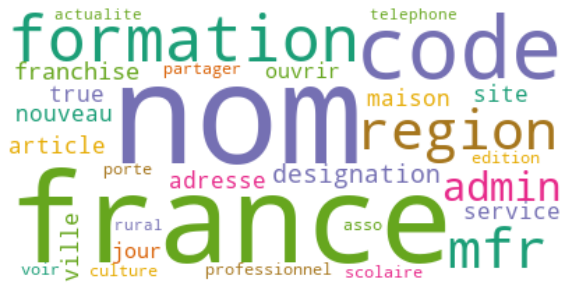

In [29]:
word_cloud(text_news_press)

## TF-IDF + Word2Vec for doc embeddings

In [ ]:
!pip3 install unidecode
# !wget http://embeddings.net/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin
!wget http://embeddings.net/frWac_no_postag_no_phrase_500_skip_cut100.bin

In [ ]:
import gensim
from unidecode import unidecode
from gensim.models import KeyedVectors
from gensim.models.doc2vec import Doc2Vec
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

#wv_from_bin = KeyedVectors.load_word2vec_format('frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin', binary=True)
wv_from_bin = KeyedVectors.load_word2vec_format('frWac_no_postag_no_phrase_500_skip_cut100.bin', binary=True)

In [ ]:
data_train.rename(columns={'train_host': 'host'}, inplace=True)
data_test.rename(columns={'test_host': 'host'}, inplace=True)
data_all = pd.concat([data_train[['host', 'text']], data_test[['host', 'text']]], ignore_index=False)
data_all.set_index('host', inplace=True)
data_all.fillna('', inplace=True)

In [ ]:
#Attention, on a des NaN dans les textes
data_train[data_train.isnull().values]

In [ ]:
data_test[data_test.isnull().values]

In [ ]:
wv_from_bin["sommes"]

In [ ]:
dataset = [v[0] for v in data_all[['text']].values]
print('a')
dataset_tokenized = [word_tokenize(doc, language='french') if len(doc) > 0 else [] for doc in dataset]
print('a')
dct = Dictionary(dataset_tokenized, prune_at=1000000) 
print('a')
corpus = [dct.doc2bow(doc) for doc in dataset_tokenized]
print('a')
model = TfidfModel(corpus)

In [ ]:
try:
    doc_embeds = pickle.load(open('doc_embeds_lem.pkl', 'rb'))
except:
    doc_embeds = {}
    # for fn, doc in zip(filenames, corpus):
    for i, row in enumerate(data_all.iterrows()):
        doc_embed = np.zeros(500)
        doc = corpus[i]
        doc_tfidf = model[doc]
        l = 1
        for word_id, freq in doc_tfidf:
            try:
                word = dct[word_id]
                if len(word) > 1:
                    word_embed = wv_from_bin[dct[word_id]]
                    doc_embed += freq * word_embed
                    l += 1
            except:
                pass
        # doc_embeds.append(doc_embed / l)
        doc_embeds[row[0]] = doc_embed / l
    pickle.dump(doc_embeds, open('doc_embeds_lem.pkl', 'wb'))

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

my_pca = PCA(n_components=10)
my_tsne = TSNE(n_components=2, perplexity=5)

my_pca_fit = my_pca.fit_transform(doc_embeds)
my_tsne_fit = my_tsne.fit_transform(my_pca_fit)

plt.scatter(my_tsne_fit[:, 0], my_tsne_fit[:, 1],s=3) ### fill the gap ###

In [ ]:
"l'bête".isalpha()